# Introduction to Machine Learning in Python

This step-by-step tutorial demonstrates:
1. Web scraping with requests and BeautifulSoup
2. Text preprocessing and cleaning techniques
3. Natural Language Processing fundamentals
4. Data visualization with word clouds

**Learning Objectives:**
- Understand basic web scraping techniques
- Learn text preprocessing for NLP
- Apply tokenization and normalization
- Create meaningful visualizations from text data
- Analyze text data for insights


## Import Libraries
First, we'll import all the necessary libraries for our NLP pipeline.

Before we start, let's understand what each library does and why we need it:

### Core Libraries:
- **requests**: Makes HTTP requests to web servers (like opening a webpage)
- **BeautifulSoup**: Parses HTML content and extracts text from web pages
- **re**: Regular expressions for pattern matching and text cleaning
- **pandas & numpy**: Data manipulation and numerical operations
- **collections.Counter**: Efficient counting of items in lists

### Visualization Libraries:
- **matplotlib.pyplot**: Creates static plots and charts
- **wordcloud**: Generates word cloud visualizations
- **seaborn**: Statistical data visualization (makes prettier plots)

### NLP Libraries:
- **nltk**: Natural Language Toolkit - comprehensive NLP library
- **nltk.corpus.stopwords**: Common words to remove (the, and, is, etc.)
- **nltk.tokenize**: Splits text into individual words or sentences
- **nltk.stem**: Reduces words to their root form (running → run)

In [47]:
# Core libraries for web scraping and data manipulation
import requests          # For making HTTP requests to websites
from bs4 import BeautifulSoup  # For parsing HTML and extracting text
import re               # Regular expressions for text pattern matching
import pandas as pd     # Data manipulation and analysis
import numpy as np      # Numerical operations and statistics
from collections import Counter  # Efficient counting of list elements

# Visualization libraries
import matplotlib.pyplot as plt  # Basic plotting functionality
from wordcloud import WordCloud  # Creates word cloud visualizations
import seaborn as sns           # Statistical data visualization

# Natural Language Processing libraries
import nltk                                    # Natural Language Toolkit
from nltk.corpus import stopwords            # Common words to filter out
from nltk.tokenize import word_tokenize       # Splits text into words
from nltk.stem import PorterStemmer, WordNetLemmatizer  # Word normalization

# Suppress warnings for cleaner output in educational setting
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style for consistent, attractive visualizations
plt.style.use('default')  # Use matplotlib's default clean style
sns.set_palette("husl")   # Set a colorful palette for better charts

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Download Required NLTK Data
NLTK requires specific datasets for tokenization, stopwords, and lemmatization.

NLTK (Natural Language Toolkit) requires specific datasets to function properly:

### What we're downloading:
- **punkt**: Pre-trained tokenizer that knows how to split sentences and words
- **stopwords**: Lists of common words in multiple languages (the, and, is, etc.)
- **wordnet**: English lexical database for lemmatization (finding word roots)
- **omw-1.4**: Open Multilingual Wordnet for enhanced lemmatization

### Why we need this:
These datasets contain pre-trained models and word lists that would take years to create manually. They represent linguistic knowledge built by researchers over decades.


In [37]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
print("✓ NLTK data available!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✓ NLTK data available!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Webscraping

### What is Web Scraping?
Web scraping is the process of automatically extracting data from websites. When you visit a website, your browser sends an HTTP request to a server, which responds with HTML code that your browser renders as a webpage.

### Why Do We Need Headers?
When you visit a website normally, your browser sends information about itself (called headers) to the web server. This includes:

- **User-Agent**: Identifies what browser you're using (Chrome, Firefox, etc.)
- **Accept**: What types of content your browser can handle
- **Accept-Language**: Your preferred languages
- **Accept-Encoding**: What compression methods you support

### The Problem:
Many websites block requests that don't look like they come from a real browser. A basic Python request without headers might look like a bot or scraper, causing the server to:
- Block the request entirely
- Return different (often minimal) content
- Redirect to a "bot detection" page

### The Solution:
We include headers that make our request look like it's coming from a real web browser, specifically Google Chrome on Windows 10.

### HTML Tags We'll Encounter:
- **`<p>`**: Paragraph tags - contain main text content
- **`<h1>`, `<h2>`, etc.**: Heading tags - titles and section headers
- **`<div>`**: Division tags - containers that often hold content blocks
- **`<article>`**: Article tags - main content areas
- **`<script>`**: JavaScript code - we remove this as it's not readable text
- **`<style>`**: CSS styling - we remove this as it's not content
- **`<a>`**: Links - may contain text but often just navigation
- **`<span>`**: Inline containers - sometimes contain text snippets

### robots.txt and Ethics:
Always check a website's robots.txt file (e.g., website.com/robots.txt) to see their scraping policy. Respect rate limits and terms of service!

In [49]:
# Create headers that mimic a real browser request
# This makes our request look legitimate and less likely to be blocked
headers = {
    # User-Agent tells the server what browser we're "using"
    # This specific string identifies as Chrome 91 on Windows 10
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',

    # Accept tells server what content types we can handle
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',

    # Accept-Language indicates our language preferences
    'Accept-Language': 'en-US,en;q=0.5',

    # Accept-Encoding tells server what compression we support
    'Accept-Encoding': 'gzip, deflate',

    # Connection type for HTTP/1.1
    'Connection': 'keep-alive'
}

# The website URL to scrape
url = "https://en.wikipedia.org/wiki/Sustainable_finance"

# How long to wait for response (in seconds)
timeout = 10

# Make the HTTP GET request with our headers and timeout
response = requests.get(url, headers=headers, timeout=timeout)

# Check if request was successful (status code 200 = OK)
response.raise_for_status()  # Raises exception for 4xx or 5xx status codes

# Parse HTML content using BeautifulSoup
# 'html.parser' is Python's built-in HTML parser (no extra dependencies)
soup = BeautifulSoup(response.content, 'html.parser')

# Remove script and style elements as they don't contain readable text
# These elements contain code and styling, not content for analysis
for script in soup(["script", "style"]):
    script.decompose()  # Completely remove these elements from the soup

# Extract text from HTML elements that typically contain main content
# We focus on content tags and ignore navigation, headers, footers
text_elements = soup.find_all([
    'p',        # Paragraphs - main text content
    'h1', 'h2', 'h3', 'h4', 'h5', 'h6',  # Headings - section titles
    'article',  # Article content - often main content area
    'div'       # Division containers - may contain text blocks
])

extracted_text = []
for element in text_elements:
    # Get text content and remove leading/trailing whitespace
    text = element.get_text().strip()

    # Filter out very short text snippets (likely navigation or ads)
    # Only keep text longer than 20 characters to focus on meaningful content
    if text and len(text) > 20:
        extracted_text.append(text)

# Join all extracted text pieces with spaces
raw_text = ' '.join(extracted_text)
print(f"✓ Successfully extracted {len(raw_text)} characters")

✓ Successfully extracted 435629 characters


## Text Cleaning and Preprocessing
Now we'll clean the raw text by removing unwanted characters, URLs, and normalize the text.

### Why Do We Need Text Cleaning?
Raw text from websites often contains:
- **Mixed case letters**: "SUSTAINABLE" vs "sustainable" vs "Sustainable"
- **Special characters**: @, #, $, %, etc. that don't add meaning
- **URLs and email addresses**: Technical strings that aren't relevant to content analysis
- **Extra whitespace**: Multiple spaces, tabs, line breaks
- **Numbers**: Often not relevant for topic analysis (unless specifically needed)

### What Each Cleaning Step Does:
1. **Lowercase conversion**: Treats "Finance", "finance", and "FINANCE" as the same word
2. **URL removal**: Eliminates web links that don't contribute to meaning
3. **Email removal**: Removes email addresses that are just contact information
4. **Special character removal**: Keeps only letters and spaces for word analysis
5. **Whitespace normalization**: Ensures consistent spacing between words

### Regular Expressions Explained:
- `r'http[s]?://...'`: Matches web URLs starting with http:// or https://
- `r'\S+@\S+'`: Matches email addresses (non-space chars + @ + non-space chars)
- `r'[^a-zA-Z\s]'`: Matches anything that's NOT a letter or space
- `r'\s+'`: Matches one or more whitespace characters

In [50]:
print("🧹 Starting comprehensive text cleaning process...")

# Store original text statistics for comparison
original_length = len(raw_text)
original_words = len(raw_text.split())

# Step 1: Convert to lowercase
# This ensures "Sustainable", "sustainable", and "SUSTAINABLE" are treated as the same word
cleaned_text = raw_text.lower()
print("✓ Step 1: Converted to lowercase")

# Step 2: Remove URLs using regular expressions
# Pattern explanation: http[s]? = http or https, followed by URL structure
cleaned_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', cleaned_text)
print("✓ Step 2: Removed URLs")

# Step 3: Remove email addresses
# Pattern explanation: \S+ = one or more non-space characters, @ = literal @, \S+ = more non-space chars
cleaned_text = re.sub(r'\S+@\S+', '', cleaned_text)
print("✓ Step 3: Removed email addresses")

# Step 4: Remove special characters and digits
# Pattern explanation: [^a-zA-Z\s] = anything NOT (^) a letter (a-zA-Z) or space (\s)
# This keeps only alphabetic characters and spaces
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
print("✓ Step 4: Removed special characters and digits")

# Step 5: Normalize whitespace
# \s+ matches one or more whitespace characters (spaces, tabs, newlines)
# Replace all with single space, then strip leading/trailing spaces
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
print("✓ Step 5: Normalized whitespace")

# Calculate cleaning statistics
cleaned_length = len(cleaned_text)
cleaned_words = len(cleaned_text.split())
reduction_percentage = ((original_length - cleaned_length) / original_length * 100)

print(f"\n📊 Cleaning Results Summary:")
print(f"   Original: {original_length:,} characters, {original_words:,} words")
print(f"   Cleaned:  {cleaned_length:,} characters, {cleaned_words:,} words")
print(f"   Reduction: {reduction_percentage:.1f}% characters removed")
print(f"\n📄 Cleaned text preview:")
print(f"{cleaned_text[:200]}...")

🧹 Starting comprehensive text cleaning process...
✓ Step 1: Converted to lowercase
✓ Step 2: Removed URLs
✓ Step 3: Removed email addresses
✓ Step 4: Removed special characters and digits
✓ Step 5: Normalized whitespace

📊 Cleaning Results Summary:
   Original: 435,629 characters, 60,306 words
   Cleaned:  386,549 characters, 56,031 words
   Reduction: 11.3% characters removed

📄 Cleaned text preview:
main menu main menu move to sidebar hide navigation main pagecontentscurrent eventsrandom articleabout wikipediacontact us contribute helplearn to editcommunity portalrecent changesupload filespecial ...


## Tokenization
Break the text into individual words (tokens) for analysis.

### What is Tokenization?
Tokenization is the process of breaking text into individual units (tokens), usually words. This seems simple, but it's more complex than just splitting on spaces because of:

- **Punctuation**: "finance." vs "finance"
- **Contractions**: "don't" → "do" + "n't" or "don't"?
- **Hyphenated words**: "co-investment" → one token or two?
- **Abbreviations**: "U.S.A." should be one token

### Why Use NLTK's Tokenizer?
NLTK's `word_tokenize()` function uses sophisticated rules to handle these edge cases. It's been trained on large corpora and knows how to properly split English text.

### What We'll Analyze:
- **Total tokens**: How many words we found
- **Unique tokens**: How many different words (vocabulary size)
- **Token length distribution**: Are words mostly short or long?

In [51]:
print("🔤 Starting tokenization process...")

# Use NLTK's sophisticated word tokenizer
# This handles punctuation, contractions, and other edge cases better than simple splitting
tokens = word_tokenize(cleaned_text)

# Calculate basic statistics about our tokens
total_tokens = len(tokens)
unique_tokens = len(set(tokens))  # set() removes duplicates
vocabulary_size = unique_tokens

print(f"✓ Tokenization complete!")
print(f"\n📊 Tokenization Statistics:")
print(f"   Total tokens: {total_tokens:,}")
print(f"   Unique tokens: {unique_tokens:,}")
print(f"   Vocabulary diversity: {unique_tokens/total_tokens:.3f}")

# Show first 20 tokens to verify tokenization worked correctly
print(f"\n🔍 First 20 tokens: {tokens[:20]}")

# Analyze token length distribution
token_lengths = [len(token) for token in tokens]
print(f"\n📈 Token Length Analysis:")
print(f"   Average length: {np.mean(token_lengths):.2f} characters")
print(f"   Shortest token: {min(token_lengths)} characters")
print(f"   Longest token: {max(token_lengths)} characters")
print(f"   Most common length: {Counter(token_lengths).most_common(1)[0][0]} characters")

# Find some example tokens of different lengths
short_tokens = [t for t in tokens if len(t) <= 3][:5]
long_tokens = [t for t in tokens if len(t) >= 8][:5]
print(f"   Example short tokens: {short_tokens}")
print(f"   Example long tokens: {long_tokens}")

🔤 Starting tokenization process...
✓ Tokenization complete!

📊 Tokenization Statistics:
   Total tokens: 56,031
   Unique tokens: 2,245
   Vocabulary diversity: 0.040

🔍 First 20 tokens: ['main', 'menu', 'main', 'menu', 'move', 'to', 'sidebar', 'hide', 'navigation', 'main', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'us', 'contribute', 'helplearn', 'to', 'editcommunity', 'portalrecent']

📈 Token Length Analysis:
   Average length: 5.90 characters
   Shortest token: 1 characters
   Longest token: 31 characters
   Most common length: 3 characters
   Example short tokens: ['to', 'us', 'to', 'log', 'in']
   Example long tokens: ['navigation', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact']


## Remove Stopwords and Filter Tokens
Remove common words that don't carry much meaning and filter out very short words.

### What are Stopwords?
Stopwords are common words that appear frequently in text but carry little semantic meaning for analysis:
- **Articles**: a, an, the
- **Prepositions**: in, on, at, by, for
- **Pronouns**: I, you, he, she, it
- **Common verbs**: is, are, was, were, have, has
- **Conjunctions**: and, or, but

### Why Remove Them?
- They dominate frequency counts without adding insight
- They can obscure more meaningful patterns
- They increase computational overhead without benefit
- They're not useful for topic modeling or keyword extraction

### Custom Stopwords:
We add domain-specific stopwords that might appear frequently but don't add analytical value in our context.

### Filtering Criteria:
- **Alphabetic only**: Remove numbers and mixed alphanumeric tokens
- **Minimum length**: Remove very short words (usually not meaningful)
- **Stopword removal**: Remove common English stopwords

In [52]:
print("🛑 Starting stopword removal and token filtering...")

# Load English stopwords from NLTK
# This is a curated list of ~180 common English words
stop_words = set(stopwords.words('english'))
print(f"📊 Loaded {len(stop_words)} standard English stopwords")

# Add custom stopwords relevant to our analysis
# These are words that might appear frequently in web text but don't add analytical value
custom_stopwords = {
    # Common web text words
    'said', 'says', 'would', 'could', 'should', 'one', 'two', 'also', 'may', 'might',

    # Common action words that don't add domain-specific meaning
    'get', 'got', 'going', 'go', 'come', 'came', 'take', 'taken', 'make', 'made',

    # Common thinking/perception words
    'see', 'seen', 'know', 'known', 'think', 'thought', 'want', 'wanted', 'need',

    # Vague descriptors
    'like', 'way', 'time', 'year', 'years', 'day', 'days', 'people', 'person',

    # Common web/document words
    'include', 'includes', 'including', 'well', 'much', 'many', 'use', 'used', 'using'
}

# Combine standard and custom stopwords
stop_words.update(custom_stopwords)
print(f"📊 Added {len(custom_stopwords)} custom stopwords")
print(f"📊 Total stopwords: {len(stop_words)}")

# Filter tokens based on multiple criteria
filtered_tokens = []
removed_counts = {
    'non_alphabetic': 0,    # Numbers, punctuation, mixed alphanumeric
    'too_short': 0,         # Words with 2 or fewer characters
    'stopwords': 0          # Common words without semantic meaning
}

for token in tokens:
    # Check if token is purely alphabetic (no numbers or special characters)
    if not token.isalpha():
        removed_counts['non_alphabetic'] += 1
        continue

    # Check if token is long enough to be meaningful
    if len(token) <= 2:
        removed_counts['too_short'] += 1
        continue

    # Check if token is a stopword
    if token in stop_words:
        removed_counts['stopwords'] += 1
        continue

    # If token passes all filters, keep it
    filtered_tokens.append(token)

# Calculate filtering statistics
print(f"\n✓ Token filtering complete!")
print(f"\n📊 Filtering Results:")
print(f"   Original tokens: {len(tokens):,}")
print(f"   Filtered tokens: {len(filtered_tokens):,}")
print(f"   Total removed: {len(tokens) - len(filtered_tokens):,}")
print(f"\n📊 Removal breakdown:")
print(f"   Non-alphabetic: {removed_counts['non_alphabetic']:,}")
print(f"   Too short (≤2 chars): {removed_counts['too_short']:,}")
print(f"   Stopwords: {removed_counts['stopwords']:,}")

print(f"\n🔍 First 20 filtered tokens: {filtered_tokens[:20]}")

# Calculate vocabulary reduction
original_vocab = len(set(tokens))
filtered_vocab = len(set(filtered_tokens))
vocab_reduction = ((original_vocab - filtered_vocab) / original_vocab * 100)
print(f"\n📈 Vocabulary Analysis:")
print(f"   Original vocabulary: {original_vocab:,} unique words")
print(f"   Filtered vocabulary: {filtered_vocab:,} unique words")
print(f"   Vocabulary reduction: {vocab_reduction:.1f}%")

🛑 Starting stopword removal and token filtering...
📊 Loaded 198 standard English stopwords
📊 Added 47 custom stopwords
📊 Total stopwords: 244

✓ Token filtering complete!

📊 Filtering Results:
   Original tokens: 56,031
   Filtered tokens: 36,873
   Total removed: 19,158

📊 Removal breakdown:
   Non-alphabetic: 0
   Too short (≤2 chars): 8,595
   Stopwords: 10,563

🔍 First 20 filtered tokens: ['main', 'menu', 'main', 'menu', 'move', 'sidebar', 'hide', 'navigation', 'main', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'contribute', 'helplearn', 'editcommunity', 'portalrecent', 'changesupload', 'filespecial', 'pages']

📈 Vocabulary Analysis:
   Original vocabulary: 2,245 unique words
   Filtered vocabulary: 2,079 unique words
   Vocabulary reduction: 7.4%


## Lemmatization - Reducing Words to Root Forms
Convert words to their base form (lemmatization) for better analysis.

### What is Lemmatization?
Lemmatization reduces words to their base or dictionary form (lemma) while preserving meaning:
- **running, runs, ran** → **run**
- **better, best** → **good**
- **children** → **child**
- **mice** → **mouse**

### Lemmatization vs Stemming:
- **Stemming**: Crude chopping of word endings (running → runn, flies → fli)
- **Lemmatization**: Uses vocabulary and morphological analysis (running → run, flies → fly)

### Why Use Lemmatization?
1. **Reduces vocabulary size**: Treats related words as the same concept
2. **Improves analysis**: "invest", "investing", "investment" become related
3. **Better for readability**: Output words are real dictionary words
4. **Semantic preservation**: Maintains the actual meaning of words

### NLTK's WordNetLemmatizer:
Uses the WordNet lexical database to find proper lemmas. More accurate than simple stemming but requires more computational resources.


In [53]:
print("🔄 Starting lemmatization process...")

# Initialize the WordNet lemmatizer
# WordNet is a large lexical database of English that groups words into cognitive synonyms
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each filtered token
# This reduces words to their base form while maintaining semantic meaning
lemmatized_tokens = []
lemmatization_examples = []  # Store examples to show the process

for token in filtered_tokens:
    # Apply lemmatization (default is noun lemmatization)
    lemmatized = lemmatizer.lemmatize(token)
    lemmatized_tokens.append(lemmatized)

    # Collect examples where lemmatization changed the word
    if token != lemmatized and len(lemmatization_examples) < 10:
        lemmatization_examples.append((token, lemmatized))

print("✓ Lemmatization complete!")

# Show examples of how lemmatization changed words
print(f"\n🔍 Lemmatization Examples (showing {len(lemmatization_examples)} changes):")
for original, lemmatized in lemmatization_examples:
    print(f"   {original:<15} → {lemmatized}")

if not lemmatization_examples:
    print("   No lemmatization changes detected in this sample")
    print("   (This is normal for shorter texts or when words are already in base form)")

# Calculate lemmatization impact
original_unique = len(set(filtered_tokens))
lemmatized_unique = len(set(lemmatized_tokens))
vocabulary_reduction = original_unique - lemmatized_unique

print(f"\n📊 Lemmatization Impact:")
print(f"   Before lemmatization: {original_unique:,} unique words")
print(f"   After lemmatization: {lemmatized_unique:,} unique words")
print(f"   Vocabulary reduction: {vocabulary_reduction} words ({vocabulary_reduction/original_unique*100:.1f}%)")

# Store final processed tokens for analysis
final_tokens = lemmatized_tokens
print(f"\n✅ Text preprocessing complete!")
print(f"📊 Final dataset: {len(final_tokens):,} tokens ready for analysis")
print(f"📊 Final vocabulary: {len(set(final_tokens)):,} unique words")

🔄 Starting lemmatization process...
✓ Lemmatization complete!

🔍 Lemmatization Examples (showing 10 changes):
   pages           → page
   tools           → tool
   pages           → page
   editors         → editor
   pages           → page
   pages           → page
   pages           → page
   pages           → page
   pages           → page
   pages           → page

📊 Lemmatization Impact:
   Before lemmatization: 2,079 unique words
   After lemmatization: 1,945 unique words
   Vocabulary reduction: 134 words (6.4%)

✅ Text preprocessing complete!
📊 Final dataset: 36,873 tokens ready for analysis
📊 Final vocabulary: 1,945 unique words


## Frequency Analysis
Analyze the most common words in our sustainable finance text.

### What is Frequency Analysis?
Frequency analysis counts how often each word appears in our text. This helps us:
- **Identify key themes**: Most frequent words often indicate main topics
- **Understand content focus**: High-frequency terms show what the text emphasizes
- **Spot patterns**: Repeated concepts suggest important ideas
- **Quality check**: Ensure our preprocessing worked correctly

### Interpreting Results:
- **Very high frequency**: Core concepts of the domain (sustainable, finance, investment)
- **Medium frequency**: Supporting concepts and details
- **Low frequency**: Specific examples, proper nouns, technical terms

### Limitations:
- Frequency ≠ importance (some rare words might be very meaningful)
- Context matters (same word can have different meanings)
- Needs domain knowledge for proper interpretation

📊 Starting comprehensive frequency analysis...
✓ Frequency analysis complete!
📊 Analyzed 1945 unique words

🏆 Top 20 Most Frequent Words in Sustainable Finance Text:
Rank Word            Count  Frequency % 
1    green           804    2.18        %
2    sustainable     779    2.11        %
3    finance         745    2.02        %
4    retrieved       447    1.21        %
5    archived        413    1.12        %
6    bond            406    1.10        %
7    original        406    1.10        %
8    bank            398    1.08        %
9    esg             345    0.94        %
10   central         335    0.91        %
11   climate         328    0.89        %
12   european        323    0.88        %
13   financial       296    0.80        %
14   china           255    0.69        %
15   standard        243    0.66        %
16   policy          215    0.58        %
17   environmental   215    0.58        %
18   investment      202    0.55        %
19   market          198    0.54     

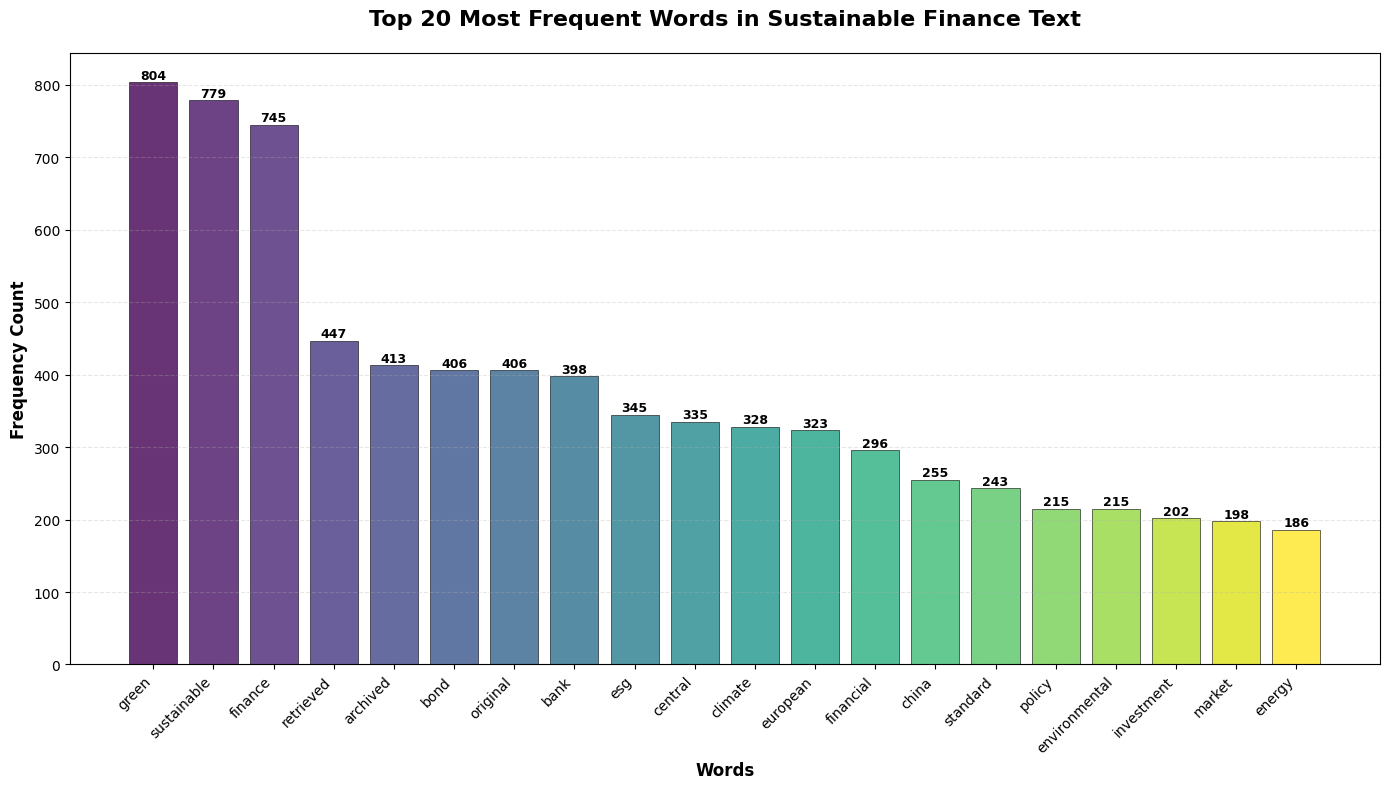

📊 Frequency visualization created!


In [54]:
print("📊 Starting comprehensive frequency analysis...")

# Use Counter to efficiently count word frequencies
# Counter is optimized for counting and provides useful methods
word_freq = Counter(final_tokens)

# Get the most common words
most_common_20 = word_freq.most_common(20)
most_common_50 = word_freq.most_common(50)

print(f"✓ Frequency analysis complete!")
print(f"📊 Analyzed {len(word_freq)} unique words")

# Display top words in a formatted table
print(f"\n🏆 Top 20 Most Frequent Words in Sustainable Finance Text:")
print("=" * 60)
print(f"{'Rank':<4} {'Word':<15} {'Count':<6} {'Frequency %':<12}")
print("=" * 60)

total_words = len(final_tokens)
for i, (word, count) in enumerate(most_common_20, 1):
    frequency_percent = (count / total_words) * 100
    print(f"{i:<4} {word:<15} {count:<6} {frequency_percent:<12.2f}%")

# Calculate some interesting statistics
unique_words = len(word_freq)
singleton_words = len([word for word, count in word_freq.items() if count == 1])
top_10_coverage = sum(count for word, count in word_freq.most_common(10)) / total_words * 100

print(f"\n📈 Frequency Distribution Statistics:")
print(f"   Total words: {total_words:,}")
print(f"   Unique words: {unique_words:,}")
print(f"   Words appearing only once: {singleton_words:,} ({singleton_words/unique_words*100:.1f}%)")
print(f"   Top 10 words cover: {top_10_coverage:.1f}% of all text")

# Create a professional frequency visualization
plt.figure(figsize=(14, 8))

# Extract words and counts for plotting
words, counts = zip(*most_common_20)

# Create bar plot with color gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Color gradient
bars = plt.bar(range(len(words)), counts, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# Customize the plot
plt.title('Top 20 Most Frequent Words in Sustainable Finance Text', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency Count', fontsize=12, fontweight='bold')

# Set x-axis labels
plt.xticks(range(len(words)), words, rotation=45, ha='right', fontsize=10)

# Add value labels on top of bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold', fontsize=9)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

print("📊 Frequency visualization created!")


# Create Word Cloud
Generate a beautiful word cloud visualization from our processed text.

### What is a Word Cloud?
A word cloud is a visual representation where:
- **Word size** indicates frequency (bigger = more frequent)
- **Word position** is arranged aesthetically
- **Colors** are chosen for visual appeal
- **Layout** maximizes space usage while avoiding overlaps

### Word Cloud Parameters Explained:
- **width/height**: Canvas size in pixels
- **max_words**: Maximum number of words to display
- **background_color**: Background color ('white', 'black', etc.)
- **colormap**: Color scheme ('viridis', 'plasma', 'coolwarm', etc.)
- **relative_scaling**: How much importance to give to frequency vs fitting
- **random_state**: Ensures reproducible layouts
- **collocations**: Whether to group related words together

### Best Practices:
- Use high resolution for presentations
- Choose colors that contrast with background
- Limit words to avoid clutter
- Consider your audience when choosing color schemes

☁️ Creating word cloud visualization...
📊 Preparing word cloud from 36873 tokens
📊 Text length for cloud: 308475 characters


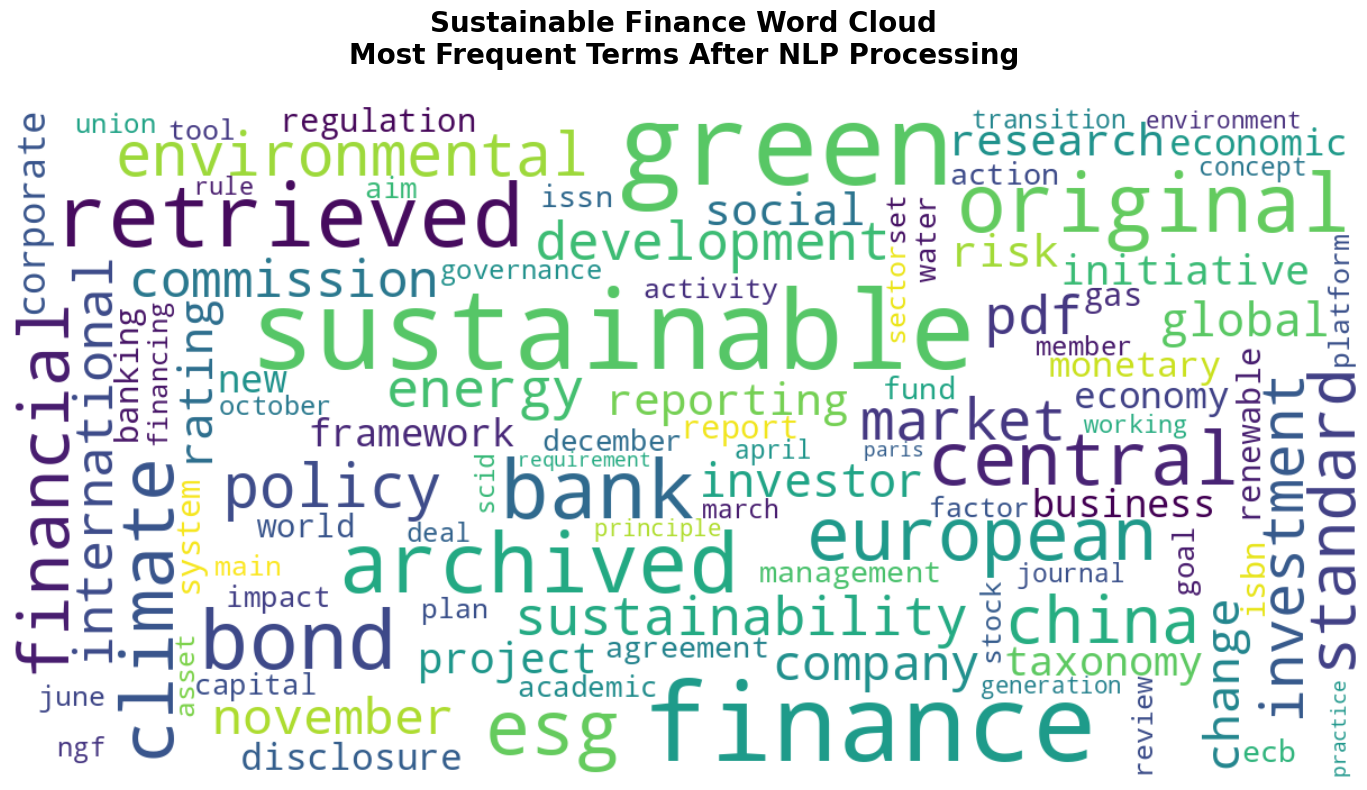

✅ Word cloud created successfully!

📊 Word Cloud Technical Details:
   Resolution: 1200 x 600 pixels
   Words displayed: 100 out of 100 maximum
   Background: white

☁️ Top words visible in cloud: green, sustainable, finance, retrieved, archived, bond, original, bank, esg, central, climate, european, financial, china, standard, policy, environmental, investment, market, energy


In [67]:
print("☁️ Creating word cloud visualization...")

# Prepare text for word cloud by joining tokens back into a single string
# WordCloud expects a single string, not a list of tokens
text_for_cloud = ' '.join(final_tokens)

print(f"📊 Preparing word cloud from {len(final_tokens)} tokens")
print(f"📊 Text length for cloud: {len(text_for_cloud)} characters")

# Create WordCloud object with carefully chosen parameters
wordcloud = WordCloud(
    width=1200,              # Width in pixels (high resolution for presentations)
    height=600,              # Height in pixels (16:9 aspect ratio)
    max_words=100,           # Maximum number of words to display
    background_color='white', # Clean white background for professional look
    colormap='viridis',      # Professional color scheme (blue to yellow)
    relative_scaling=0.5,    # Balance between frequency and fitting (0.0-1.0)
    random_state=42,         # Fixed seed for reproducible layouts
    collocations=False,      # Don't artificially group words together
    min_font_size=10,        # Minimum font size for readability
    max_font_size=100,       # Maximum font size for emphasis
    prefer_horizontal=0.7    # 70% horizontal text, 30% vertical (better readability)
).generate(text_for_cloud)

# Create a high-quality visualization
plt.figure(figsize=(16, 8))  # Large figure size for detailed view
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth image rendering
plt.axis('off')  # Remove axis labels and ticks

# Add a professional title
plt.title('Sustainable Finance Word Cloud\nMost Frequent Terms After NLP Processing',
          fontsize=20, fontweight='bold', pad=30)

# Adjust layout to prevent any cutoff
plt.tight_layout()
plt.show()

print("✅ Word cloud created successfully!")

# Display some technical details about the word cloud
print(f"\n📊 Word Cloud Technical Details:")
print(f"   Resolution: {wordcloud.width} x {wordcloud.height} pixels")
print(f"   Words displayed: {len(wordcloud.words_)} out of {wordcloud.max_words} maximum")
print(f"   Background: {wordcloud.background_color}")

# Show which words made it into the cloud
cloud_words = list(wordcloud.words_.keys())[:20]  # Top 20 words that appear in cloud
print(f"\n☁️ Top words visible in cloud: {', '.join(cloud_words)}")

## Advanced Text Analysis and Insights
Generate deeper insights about the text characteristics.

### What Makes Good Text Analysis?
Beyond basic frequency counts, we can extract deeper insights:

1. **Lexical Diversity**: Vocabulary richness (unique words / total words)
2. **Word Length Patterns**: Average word length indicates text complexity
3. **Distribution Analysis**: How words are distributed across frequency ranges
4. **Vocabulary Composition**: Types of words (technical terms vs common words)

### Interpreting Metrics:
- **High lexical diversity** (>0.6): Rich vocabulary, complex text
- **Low lexical diversity** (<0.3): Repetitive text, focused topic
- **Long average word length** (>6 chars): Technical or academic text
- **Short average word length** (<4 chars): Simple, accessible text

### Statistical Significance:
These metrics help us understand:
- Text complexity level
- Author's vocabulary richness
- Topic specialization degree
- Target audience level

🔍 Generating comprehensive text analysis insights...
📈 COMPREHENSIVE TEXT ANALYSIS REPORT

📊 BASIC STATISTICS:
   Total processed tokens: 36,873
   Unique vocabulary: 1,945
   Lexical diversity: 0.053
   Average word length: 7.37 characters
   Median word length: 7.0 characters
   Word length std dev: 2.77

🏆 VOCABULARY COMPOSITION:
   High frequency words (≥5 times): 1920 (98.7%)
   Medium frequency words (2-4 times): 23 (1.2%)
   Low frequency words (1 time): 2 (0.1%)

🔍 WORD LENGTH ANALYSIS:
   Longest words: environmentsustainabilityhidden, espaolfranaislietuviportugus, wwwgreenfinanceplatformorg, environmentsustainability, sustainabilityoriented
   Shortest words: eu, ecb, ngf, aaa, hdl

📊 FREQUENCY DISTRIBUTION:
   Average word frequency: 18.96
   Frequency standard deviation: 45.47
   Most frequent word: 'green' (804 times)


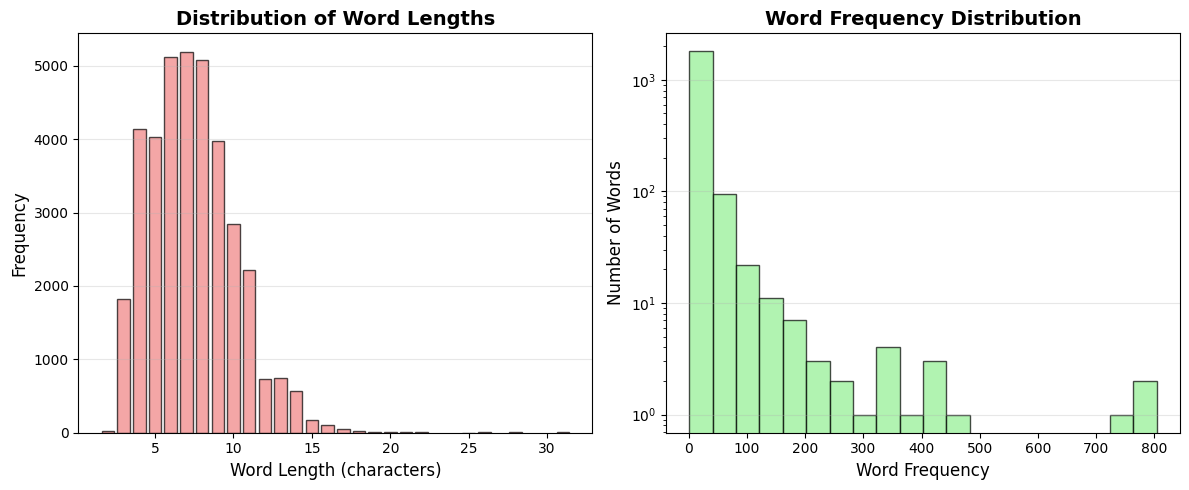


🎯 TEXT COMPLEXITY ASSESSMENT:
   Vocabulary diversity: Low (Focused/repetitive vocabulary)
   Word complexity: High (Technical/academic)
   Text focus: Broadly accessible


In [58]:
print("🔍 Generating comprehensive text analysis insights...")

# Calculate core text statistics
total_tokens = len(final_tokens)
unique_tokens = len(set(final_tokens))
lexical_diversity = unique_tokens / total_tokens if total_tokens > 0 else 0

# Word length analysis
word_lengths = [len(word) for word in final_tokens]
avg_word_length = np.mean(word_lengths) if word_lengths else 0
median_word_length = np.median(word_lengths) if word_lengths else 0
std_word_length = np.std(word_lengths) if word_lengths else 0

# Find words at different length extremes
longest_words = sorted(set(final_tokens), key=len, reverse=True)[:5]
shortest_words = sorted(set(final_tokens), key=len)[:5]

# Frequency distribution analysis
freq_values = list(word_freq.values())
high_freq_words = [word for word, count in word_freq.items() if count >= 5]
medium_freq_words = [word for word, count in word_freq.items() if 2 <= count < 5]
low_freq_words = [word for word, count in word_freq.items() if count == 1]

# Calculate text complexity indicators
avg_frequency = np.mean(freq_values)
freq_std = np.std(freq_values)
top_10_words = word_freq.most_common(10)

print("📈 COMPREHENSIVE TEXT ANALYSIS REPORT")
print("=" * 70)

print(f"\n📊 BASIC STATISTICS:")
print(f"   Total processed tokens: {total_tokens:,}")
print(f"   Unique vocabulary: {unique_tokens:,}")
print(f"   Lexical diversity: {lexical_diversity:.3f}")
print(f"   Average word length: {avg_word_length:.2f} characters")
print(f"   Median word length: {median_word_length:.1f} characters")
print(f"   Word length std dev: {std_word_length:.2f}")

print(f"\n🏆 VOCABULARY COMPOSITION:")
print(f"   High frequency words (≥5 times): {len(high_freq_words)} ({len(high_freq_words)/unique_tokens*100:.1f}%)")
print(f"   Medium frequency words (2-4 times): {len(medium_freq_words)} ({len(medium_freq_words)/unique_tokens*100:.1f}%)")
print(f"   Low frequency words (1 time): {len(low_freq_words)} ({len(low_freq_words)/unique_tokens*100:.1f}%)")

print(f"\n🔍 WORD LENGTH ANALYSIS:")
print(f"   Longest words: {', '.join(longest_words)}")
print(f"   Shortest words: {', '.join(shortest_words)}")

print(f"\n📊 FREQUENCY DISTRIBUTION:")
print(f"   Average word frequency: {avg_frequency:.2f}")
print(f"   Frequency standard deviation: {freq_std:.2f}")
print(f"   Most frequent word: '{top_10_words[0][0]}' ({top_10_words[0][1]} times)")

# Create word length distribution visualization
plt.figure(figsize=(12, 5))

# Subplot 1: Word length distribution
plt.subplot(1, 2, 1)
length_distribution = Counter(word_lengths)
lengths, counts = zip(*sorted(length_distribution.items()))
plt.bar(lengths, counts, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Distribution of Word Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Word Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Frequency distribution (log scale for better visualization)
plt.subplot(1, 2, 2)
plt.hist(freq_values, bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Word Frequency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Word Frequency', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.yscale('log')  # Log scale because most words appear only once
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Text complexity assessment
print(f"\n🎯 TEXT COMPLEXITY ASSESSMENT:")
if lexical_diversity > 0.6:
    diversity_level = "High (Rich vocabulary)"
elif lexical_diversity > 0.4:
    diversity_level = "Medium (Balanced vocabulary)"
else:
    diversity_level = "Low (Focused/repetitive vocabulary)"

if avg_word_length > 6:
    complexity_level = "High (Technical/academic)"
elif avg_word_length > 4.5:
    complexity_level = "Medium (Standard)"
else:
    complexity_level = "Low (Simple/accessible)"

print(f"   Vocabulary diversity: {diversity_level}")
print(f"   Word complexity: {complexity_level}")
print(f"   Text focus: {'Highly specialized' if len(low_freq_words)/unique_tokens > 0.7 else 'Broadly accessible'}")


## Domain-Specific Analysis for Sustainable Finance
Analyze sustainable finance specific terms and concepts.

### Why Domain-Specific Analysis?
Generic word frequency tells us what words appear most often, but domain-specific analysis reveals:
- **Thematic coverage**: Which aspects of sustainable finance are emphasized
- **Conceptual balance**: How evenly different topics are covered
- **Terminology usage**: Professional vs. general language patterns
- **Content gaps**: What topics might be underrepresented

### Sustainable Finance Concept Categories:
1. **Environmental**: Climate, carbon, renewable, biodiversity
2. **Social**: Community, human rights, labor, inequality
3. **Governance**: Regulation, compliance, transparency
4. **Finance**: Investment, lending, bonds, portfolios, risk
5. **Sustainability**: ESG, impact, responsible investing

### Applications:
- **Content analysis**: Understand document focus
- **Compliance checking**: Ensure all ESG aspects covered
- **Trend analysis**: Track concept evolution over time
- **Quality assessment**: Evaluate content comprehensiveness

🌱 Starting domain-specific sustainable finance analysis...
📊 Analyzing 51 domain-specific terms

📊 Sustainable Finance Concept Analysis Results:
Finance        : 2258 mentions ( 33.2%)
                 Top terms: finance(745), bond(406), financial(296)
Environmental  : 1832 mentions ( 26.9%)
                 Top terms: green(804), climate(328), environmental(215)
Sustainability : 1641 mentions ( 24.1%)
                 Top terms: sustainable(779), esg(345), sustainability(182)
Governance     : 616 mentions (  9.1%)
                 Top terms: reporting(133), framework(109), disclosure(101)
Social         : 454 mentions (  6.7%)
                 Top terms: development(179), social(132), capital(77)

📈 Domain Coverage Analysis:
   Total domain-specific mentions: 6801
   Domain coverage of text: 18.4%
   Most emphasized aspect: Finance
   Least emphasized aspect: Social


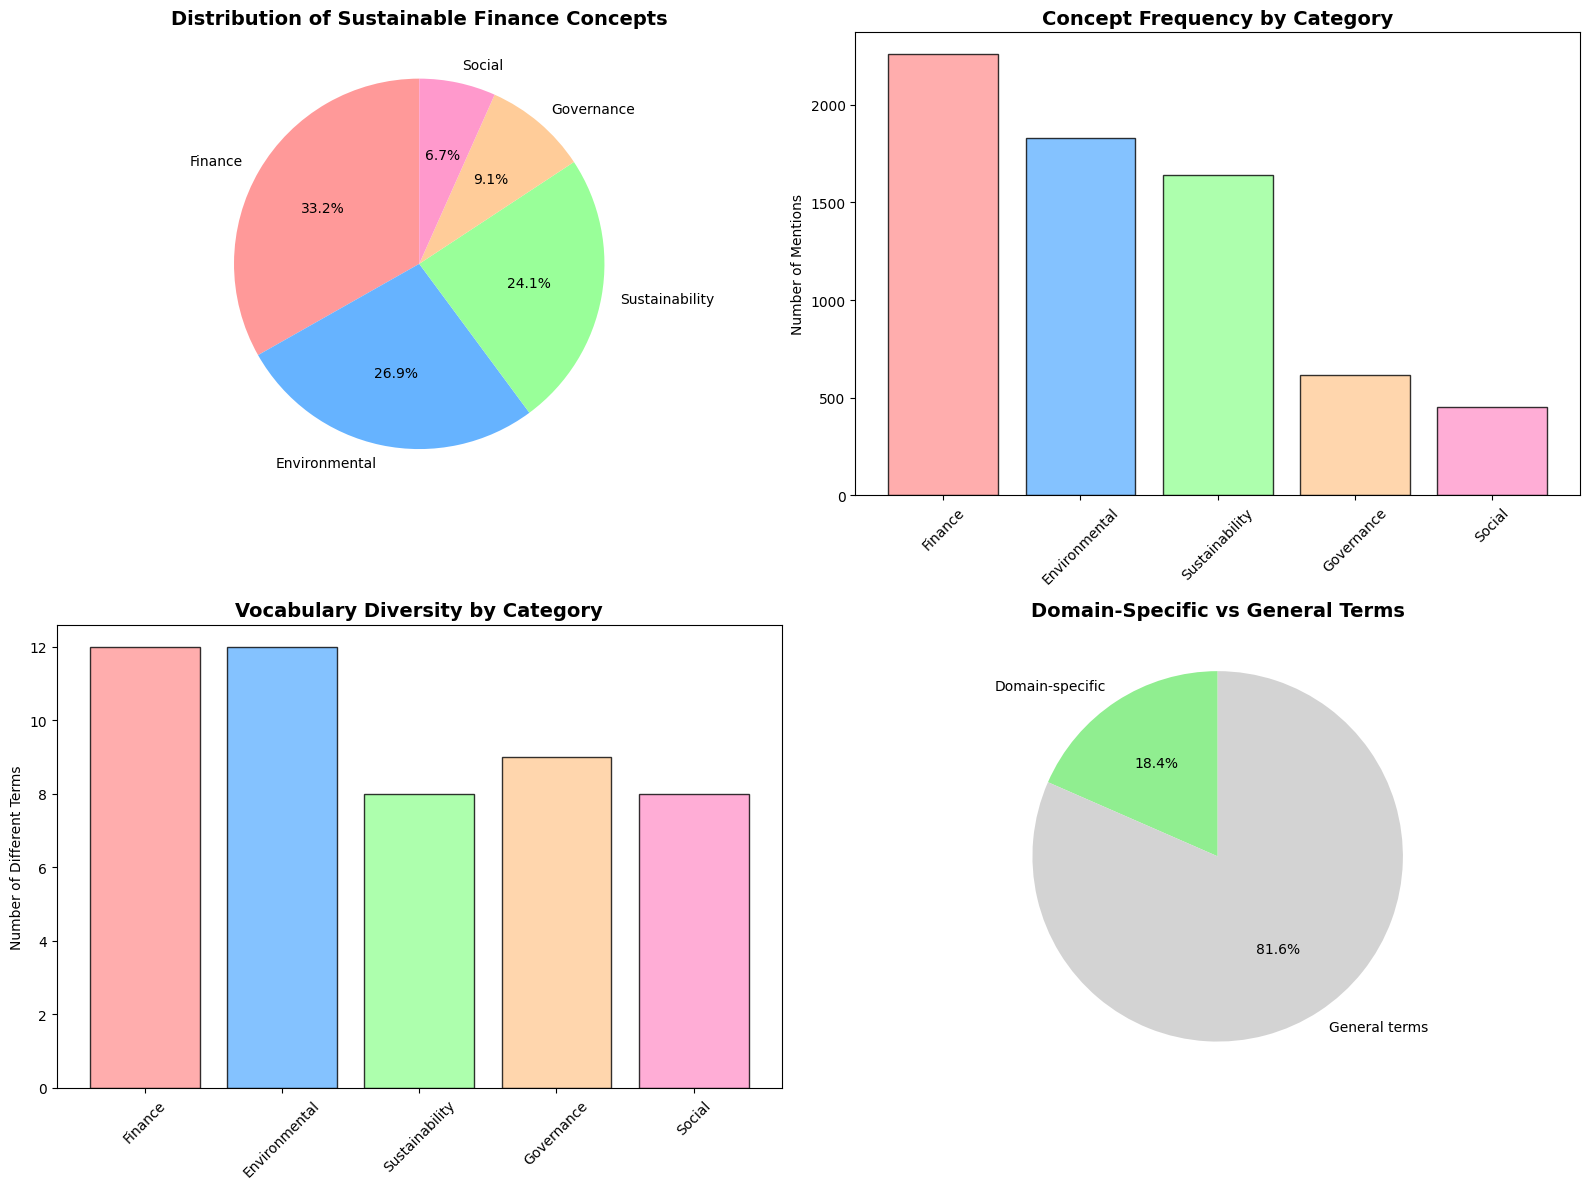

📊 Domain-specific visualizations created!


In [59]:
print("🌱 Starting domain-specific sustainable finance analysis...")

# Define comprehensive sustainable finance keyword categories
# These categories represent core concepts in sustainable finance
sustainability_keywords = {
    'environmental': [
        'environmental', 'environment', 'climate', 'carbon', 'emission', 'renewable',
        'green', 'biodiversity', 'pollution', 'circular', 'energy', 'efficiency'
    ],
    'social': [
        'social', 'community', 'human', 'labour', 'labor', 'inequality',
        'inclusiveness', 'right', 'capital', 'development'
    ],
    'governance': [
        'governance', 'regulation', 'regulatory', 'compliance', 'transparency',
        'accountability', 'framework', 'disclosure', 'reporting'
    ],
    'finance': [
        'finance', 'financial', 'investment', 'investing', 'lending', 'bond',
        'capital', 'portfolio', 'risk', 'return', 'market', 'institution'
    ],
    'sustainability': [
        'sustainable', 'sustainability', 'esg', 'impact', 'responsible',
        'transition', 'taxonomy', 'greenwashing'
    ]
}

print(f"📊 Analyzing {sum(len(keywords) for keywords in sustainability_keywords.values())} domain-specific terms")

# Count occurrences of each category
category_counts = {}
category_details = {}

for category, keywords in sustainability_keywords.items():
    # Count total mentions for this category
    total_count = 0
    word_details = {}

    for keyword in keywords:
        # Count how many times this specific keyword appears
        count = final_tokens.count(keyword)
        if count > 0:
            word_details[keyword] = count
            total_count += count

    category_counts[category] = total_count
    category_details[category] = word_details

# Sort categories by frequency
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

print(f"\n📊 Sustainable Finance Concept Analysis Results:")
print("=" * 60)

total_domain_mentions = sum(category_counts.values())
for category, count in sorted_categories:
    percentage = (count / total_domain_mentions * 100) if total_domain_mentions > 0 else 0
    print(f"{category.capitalize():<15}: {count:3d} mentions ({percentage:5.1f}%)")

    # Show top 3 words in each category
    if category_details[category]:
        top_words = sorted(category_details[category].items(), key=lambda x: x[1], reverse=True)[:3]
        top_words_str = ', '.join([f"{word}({count})" for word, count in top_words])
        print(f"{'':15}  Top terms: {top_words_str}")

# Calculate domain coverage
domain_word_count = sum(category_counts.values())
coverage_percentage = (domain_word_count / total_tokens * 100) if total_tokens > 0 else 0

print(f"\n📈 Domain Coverage Analysis:")
print(f"   Total domain-specific mentions: {domain_word_count}")
print(f"   Domain coverage of text: {coverage_percentage:.1f}%")
print(f"   Most emphasized aspect: {sorted_categories[0][0].capitalize()}")
print(f"   Least emphasized aspect: {sorted_categories[-1][0].capitalize()}")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie chart of concept distribution
labels = [cat.capitalize() for cat, _ in sorted_categories]
sizes = [count for _, count in sorted_categories]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Sustainable Finance Concepts', fontsize=14, fontweight='bold')

# 2. Bar chart of category frequencies
ax2.bar(labels, sizes, color=colors, alpha=0.8, edgecolor='black')
ax2.set_title('Concept Frequency by Category', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Mentions')
ax2.tick_params(axis='x', rotation=45)

# 3. Stacked bar showing word diversity within categories
category_diversity = [len(category_details[cat]) for cat, _ in sorted_categories]
ax3.bar(labels, category_diversity, color=colors, alpha=0.8, edgecolor='black')
ax3.set_title('Vocabulary Diversity by Category', fontsize=14, fontweight='bold')
ax3.set_ylabel('Number of Different Terms')
ax3.tick_params(axis='x', rotation=45)

# 4. Coverage analysis
coverage_data = ['Domain-specific', 'General terms']
coverage_values = [domain_word_count, total_tokens - domain_word_count]
ax4.pie(coverage_values, labels=coverage_data, autopct='%1.1f%%',
        colors=['lightgreen', 'lightgray'], startangle=90)
ax4.set_title('Domain-Specific vs General Terms', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Domain-specific visualizations created!")

## Export Results and Create Final Summary

### What We're Preparing:
1. **Analysis Summary**: Key metrics and findings
2. **Word Frequency Data**: Top words for further analysis
3. **Export Options**: Data formats for other tools
4. **Insights Report**: Human-readable conclusions

### Potential Uses of Exported Data:
- **Machine Learning**: Training data for classification models
- **Further Analysis**: Import into R, Excel, or other tools
- **Reporting**: Results for presentations or documents
- **Comparison**: Baseline for analyzing other texts

### Key Findings Format:
We'll summarize our analysis in a structured way that highlights:
- Processing effectiveness (how much noise we removed)
- Content characteristics (complexity, focus, diversity)
- Domain relevance (sustainable finance coverage)
- Actionable insights (what the data tells us)


In [62]:
print("💾 Preparing comprehensive final summary and export options...")

# Create a comprehensive analysis summary dictionary
analysis_summary = {
    # Text processing metrics
    'processing_metrics': {
        'original_text_length': len(raw_text),
        'cleaned_text_length': len(cleaned_text),
        'total_tokens_extracted': len(tokens),
        'tokens_after_filtering': len(final_tokens),
        'unique_vocabulary': len(set(final_tokens)),
        'processing_efficiency': f"{((len(tokens) - len(final_tokens)) / len(tokens) * 100):.1f}% noise removed"
    },

    # Text characteristics
    'text_characteristics': {
        'lexical_diversity': f"{lexical_diversity:.3f}",
        'avg_word_length': f"{avg_word_length:.2f} characters",
        'vocabulary_richness': f"{len(set(final_tokens)) / len(final_tokens) * 100:.1f}%",
        'complexity_level': complexity_level,
        'diversity_level': diversity_level
    },

    # Domain analysis
    'domain_analysis': {
        'total_domain_terms': domain_word_count,
        'domain_coverage': f"{coverage_percentage:.1f}%",
        'primary_focus': sorted_categories[0][0],
        'secondary_focus': sorted_categories[1][0] if len(sorted_categories) > 1 else 'None',
        'concept_distribution': dict(sorted_categories)
    },

    # Top findings
    'key_findings': {
        'most_frequent_words': word_freq.most_common(10),
        'dominant_themes': [cat for cat, count in sorted_categories[:3]],
        'vocabulary_size': len(set(final_tokens)),
        'content_focus': 'Highly specialized' if len(low_freq_words)/unique_tokens > 0.7 else 'Broadly accessible'
    }
}

# Create exportable DataFrames
word_freq_df = pd.DataFrame(word_freq.most_common(50), columns=['Word', 'Frequency'])
word_freq_df['Relative_Frequency'] = word_freq_df['Frequency'] / len(final_tokens)
word_freq_df['Cumulative_Frequency'] = word_freq_df['Frequency'].cumsum()
word_freq_df['Cumulative_Percentage'] = word_freq_df['Cumulative_Frequency'] / len(final_tokens) * 100

# Domain analysis DataFrame
domain_analysis_df = pd.DataFrame([
    {
        'Category': category.capitalize(),
        'Total_Mentions': count,
        'Percentage': f"{(count / total_domain_mentions * 100):.1f}%" if total_domain_mentions > 0 else "0%",
        'Unique_Terms': len(category_details[category]),
        'Top_Terms': ', '.join([word for word, _ in sorted(category_details[category].items(), key=lambda x: x[1], reverse=True)[:3]])
    }
    for category, count in sorted_categories
])

print("📋 FINAL COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 70)

print(f"\n🔧 TEXT PROCESSING EFFECTIVENESS:")
print(f"   Original text: {analysis_summary['processing_metrics']['original_text_length']:,} characters")
print(f"   After cleaning: {analysis_summary['processing_metrics']['cleaned_text_length']:,} characters")
print(f"   Tokens extracted: {analysis_summary['processing_metrics']['total_tokens_extracted']:,}")
print(f"   Meaningful tokens: {analysis_summary['processing_metrics']['tokens_after_filtering']:,}")
print(f"   Final vocabulary: {analysis_summary['processing_metrics']['unique_vocabulary']:,} unique words")
print(f"   Processing efficiency: {analysis_summary['processing_metrics']['processing_efficiency']}")

print(f"\n📊 TEXT CHARACTERISTICS:")
print(f"   Lexical diversity: {analysis_summary['text_characteristics']['lexical_diversity']}")
print(f"   Average word length: {analysis_summary['text_characteristics']['avg_word_length']}")
print(f"   Vocabulary richness: {analysis_summary['text_characteristics']['vocabulary_richness']}")
print(f"   Complexity level: {analysis_summary['text_characteristics']['complexity_level']}")
print(f"   Diversity level: {analysis_summary['text_characteristics']['diversity_level']}")

print(f"\n🌱 SUSTAINABLE FINANCE ANALYSIS:")
print(f"   Domain-specific terms: {analysis_summary['domain_analysis']['total_domain_terms']}")
print(f"   Domain coverage: {analysis_summary['domain_analysis']['domain_coverage']}")
print(f"   Primary focus: {analysis_summary['domain_analysis']['primary_focus'].capitalize()}")
print(f"   Secondary focus: {analysis_summary['domain_analysis']['secondary_focus'].capitalize()}")

print(f"\n🏆 KEY FINDINGS:")
print(f"   Top 5 words: {', '.join([word for word, count in analysis_summary['key_findings']['most_frequent_words'][:5]])}")
print(f"   Dominant themes: {', '.join([theme.capitalize() for theme in analysis_summary['key_findings']['dominant_themes']])}")
print(f"   Content accessibility: {analysis_summary['key_findings']['content_focus']}")

print(f"\n📊 TOP 15 WORDS - DETAILED FREQUENCY TABLE:")
print(word_freq_df.head(15).to_string(index=False, float_format='%.3f'))

print(f"\n🌍 DOMAIN CATEGORY BREAKDOWN:")
print(domain_analysis_df.to_string(index=False))

print(f"\n💡 READY FOR ADVANCED ANALYSIS:")
print(f"   ✅ Word frequency data available in 'word_freq_df'")
print(f"   ✅ Domain analysis data in 'domain_analysis_df'")
print(f"   ✅ Processed tokens ready for ML models: 'final_tokens'")
print(f"   ✅ Complete analysis summary: 'analysis_summary'")
print(f"   ✅ Word cloud visualization saved for presentations")

print(f"\n🚀 POTENTIAL NEXT STEPS:")
print(f"   • Sentiment analysis of sustainable finance concepts")
print(f"   • Topic modeling to discover hidden themes")
print(f"   • Named entity recognition for organizations/people")
print(f"   • Comparative analysis with other financial texts")
print(f"   • Machine learning classification models")
print(f"   • Time series analysis of concept evolution")

💾 Preparing comprehensive final summary and export options...
📋 FINAL COMPREHENSIVE ANALYSIS SUMMARY

🔧 TEXT PROCESSING EFFECTIVENESS:
   Original text: 435,629 characters
   After cleaning: 386,549 characters
   Tokens extracted: 56,031
   Meaningful tokens: 36,873
   Final vocabulary: 1,945 unique words
   Processing efficiency: 34.2% noise removed

📊 TEXT CHARACTERISTICS:
   Lexical diversity: 0.053
   Average word length: 7.37 characters
   Vocabulary richness: 5.3%
   Complexity level: High (Technical/academic)
   Diversity level: Low (Focused/repetitive vocabulary)

🌱 SUSTAINABLE FINANCE ANALYSIS:
   Domain-specific terms: 6801
   Domain coverage: 18.4%
   Primary focus: Finance
   Secondary focus: Environmental

🏆 KEY FINDINGS:
   Top 5 words: green, sustainable, finance, retrieved, archived
   Dominant themes: Finance, Environmental, Sustainability
   Content accessibility: Broadly accessible

📊 TOP 15 WORDS - DETAILED FREQUENCY TABLE:
       Word  Frequency  Relative_Frequency

## Conclusion and Next Steps

🎉 **Congratulations!** You've successfully completed a comprehensive NLP pipeline for sustainable finance text analysis!

### 🎯 What We Accomplished:

#### 1. **Web Scraping Fundamentals**
- ✅ Learned HTTP headers and why they're crucial for successful scraping
- ✅ Understood HTML structure and content extraction strategies
- ✅ Explored ethical considerations and robots.txt compliance

#### 2. **Text Preprocessing Mastery**
- ✅ Applied systematic text cleaning (case normalization, special character removal)
- ✅ Used regular expressions for pattern-based text cleaning
- ✅ Understood the importance of each preprocessing step

#### 3. **Advanced NLP Techniques**
- ✅ Implemented sophisticated tokenization with NLTK
- ✅ Applied stopword removal with custom domain additions
- ✅ Used lemmatization for semantic word normalization
- ✅ Performed comprehensive frequency analysis

#### 4. **Data Visualization Skills**
- ✅ Created professional word clouds with custom parameters
- ✅ Built informative frequency distribution charts
- ✅ Designed domain-specific concept visualizations

#### 5. **Domain-Specific Analysis**
- ✅ Conducted targeted sustainable finance terminology analysis
- ✅ Quantified concept coverage across ESG dimensions
- ✅ Generated actionable insights for financial content analysis

### 📊 Key NLP Concepts Mastered:

1. **Text Normalization**: Converting text to consistent format for analysis
2. **Tokenization**: Breaking text into analyzable units while preserving meaning
3. **Filtering**: Removing noise while retaining semantic content
4. **Frequency Analysis**: Understanding word importance through occurrence patterns
5. **Visualization**: Making complex text data accessible and interpretable
6. **Domain Analysis**: Extracting field-specific insights from general text

### 🌟 Real-World Applications in Sustainable Finance:

#### **ESG Report Analysis**
```python
# Analyze annual sustainability reports
reports = scrape_multiple_reports(['company1.com/esg', 'company2.com/esg'])
esg_scores = analyze_esg_coverage(reports)
```

#### **News Sentiment Tracking**
```python
# Monitor sustainable investment sentiment
news_data = scrape_financial_news('sustainable investing')
sentiment_trends = track_sentiment_over_time(news_data)
```

#### **Regulatory Compliance Monitoring**
```python
# Check compliance document coverage
compliance_text = extract_text_from_pdfs(compliance_documents)
coverage_gaps = identify_missing_concepts(compliance_text, required_topics)
```

### 🚀 Advanced Techniques to Explore Next:

#### **1. Sentiment Analysis**
```python
from textblob import TextBlob
sentiment = TextBlob(text).sentiment.polarity  # -1 (negative) to 1 (positive)
```

#### **2. Topic Modeling with LDA**
```python
from sklearn.decomposition import LatentDirichletAllocation
topics = LDA(n_components=5).fit_transform(document_term_matrix)
```

#### **3. Named Entity Recognition**
```python
import spacy
nlp = spacy.load('en_core_web_sm')
entities = [(ent.text, ent.label_) for ent in nlp(text).ents]
```

#### **4. Machine Learning Classification**
```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(tfidf_features, labels)
```

### 🛠️ Production-Ready Tools for Scaling:

#### **Industrial NLP Libraries**
- **spaCy**: Industrial-strength NLP with pre-trained models
- **transformers**: State-of-the-art language models (BERT, GPT)
- **Gensim**: Topic modeling and document similarity

#### **Data Processing at Scale**
- **Dask**: Parallel computing for large datasets
- **Apache Spark**: Distributed text processing
- **Elasticsearch**: Full-text search and analysis

#### **Visualization and Dashboards**
- **Plotly**: Interactive visualizations
- **Streamlit**: Quick web apps for NLP results
- **Tableau**: Professional business intelligence

### 📚 Recommended Learning Path:

1. **Week 1-2**: Master the fundamentals covered in this tutorial
2. **Week 3-4**: Explore sentiment analysis and basic ML
3. **Week 5-6**: Learn topic modeling and clustering
4. **Week 7-8**: Study transformer models and modern NLP
5. **Week 9-10**: Build end-to-end applications

### 🌍 Impact in Sustainable Finance:

Your new NLP skills can contribute to:
- **Transparency**: Automated analysis of ESG disclosures
- **Risk Assessment**: Early detection of sustainability risks
- **Investment Research**: Systematic analysis of sustainable opportunities
- **Compliance**: Automated monitoring of regulatory requirements
- **Stakeholder Communication**: Better understanding of public sentiment

### 🎓 Final Tips for Success:

1. **Practice Regularly**: Apply these techniques to different texts
2. **Stay Updated**: NLP evolves rapidly; follow recent developments
3. **Think Critically**: Always validate results with domain expertise
4. **Start Simple**: Master basics before moving to complex models
5. **Share Knowledge**: Teach others to reinforce your learning

**Happy analyzing! You're now equipped to extract meaningful insights from sustainable finance texts and contribute to a more transparent, data-driven approach to ESG investing.** 🚀

Remember: The goal isn't just to process text, but to discover insights that can drive positive environmental and social impact through better financial decision-making.

In [66]:
print("🎯 Tutorial complete! You're ready for advanced NLP applications in sustainable finance!")
print("📚 Use this foundation to build sophisticated text analysis tools for the summer school!")

🎯 Tutorial complete! You're ready for advanced NLP applications in sustainable finance!
📚 Use this foundation to build sophisticated text analysis tools for the summer school!
